# **📌 Internship Task 3: Linear Regression**
**Project Title:**
Patient Cancer Data – Linear Regression Analysis

**Objective:**
Implement and understand Simple & Multiple Linear Regression to predict medical insights.



# **Dataset Overview**
**Dataset Columns:**

| Feature              | Description                                 |
|----------------------|---------------------------------------------|
| Patient_ID           | Unique patient identifier                  |
| Age                  | Patient's age                              |
| Gender               | Male / Female / Other                      |
| Country_Region       | Country of residence                       |
| Year                 | Data record year                           |
| Genetic_Risk         | Genetic predisposition risk score          |
| Air_Pollution        | Air pollution exposure level               |
| Alcohol_Use          | Alcohol usage level                        |
| Smoking              | Smoking score                              |
| Obesity_Level        | Obesity percentage                         |
| Cancer_Type          | Type of cancer                             |
| Cancer_Stage         | Stage of cancer                            |
| Treatment_Cost_USD   | Medical treatment cost (in USD)            |
| Survival_Years       | Expected survival time (in years)          |
| Target_Severity_Score| 🔥 Target variable to predict (Severity)     |


# **Step 1:Import Libraries**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics

# **Step 2:Load Dataset**
Load the data to explore structure, understand features, and prepare for modeling.

In [2]:
# Load the data
df = pd.read_csv('/content/global_cancer_patients_2015_2024.csv')  # Replace with your file path
df.head()


,Patient_ID,Age,Gender,Country_Region,Year,Genetic_Risk,Air_Pollution,Alcohol_Use,Smoking,Obesity_Level,Cancer_Type,Cancer_Stage,Treatment_Cost_USD,Survival_Years,Target_Severity_Score
0,PT0000000,71,Male,UK,2021,6.4,2.8,9.5,0.9,8.7,Lung,Stage III,62913.44,5.9,4.92
1,PT0000001,34,Male,China,2021,1.3,4.5,3.7,3.9,6.3,Leukemia,Stage 0,12573.41,4.7,4.65
2,PT0000002,80,Male,Pakistan,2023,7.4,7.9,2.4,4.7,0.1,Breast,Stage II,6984.33,7.1,5.84
3,PT0000003,40,Male,UK,2015,1.7,2.9,4.8,3.5,2.7,Colon,Stage I,67446.25,1.6,3.12
4,PT0000004,43,Female,Brazil,2017,5.1,2.8,2.3,6.7,0.5,Skin,Stage III,77977.12,2.9,3.62


# **Step 3: Basic Processing**

In [3]:
# Check for nulls
print(df.isnull().sum())

# Optional: Drop non-numeric columns for regression
df = df.drop(['Patient_ID', 'Country_Region', 'Cancer_Type', 'Cancer_Stage', 'Gender'], axis=1)


Patient_ID               0
Age                      0
Gender                   0
Country_Region           0
Year                     0
Genetic_Risk             0
Air_Pollution            0
Alcohol_Use              0
Smoking                  0
Obesity_Level            0
Cancer_Type              0
Cancer_Stage             0
Treatment_Cost_USD       0
Survival_Years           0
Target_Severity_Score    0
dtype: int64


# **Dataset is clean and ready for feature selection.**

# **Step-4: Split Data into Train-Test Sets**

**Split the dataset into training and testing sets to evaluate model performance later**

In [4]:
X = df.drop('Target_Severity_Score', axis=1)
y = df['Target_Severity_Score']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


# **Step-5: Train Linear Regression Model**
**Fit a Linear Regression model using the training data.**

In [5]:
model = LinearRegression()
model.fit(X_train, y_train)


LinearRegression()

# **Step 6:Evaluate Model**

In [6]:
# Predict
y_pred = model.predict(X_test)

# Metrics
mae = metrics.mean_absolute_error(y_test, y_pred)
mse = metrics.mean_squared_error(y_test, y_pred)
r2 = metrics.r2_score(y_test, y_pred)

print(f"MAE: {mae:.2f}")
print(f"MSE: {mse:.2f}")
print(f"R² Score: {r2:.2f}")


MAE: 0.00
MSE: 0.00
R² Score: 1.00


Model Evaluation Results
-----------------------

**1] Mean Absolute Error (MAE):** **0.00**
→ The model’s predictions are almost exactly matching the actual values. Practically no average error.

**2] Mean Squared Error (MSE): 0.00**
→ Very low overall error; squared differences are negligible.

**3] R² Score: 1.00**
→ The model perfectly explains the variation in the target variable. It is an ideal fit for the given dataset.



# **Step 7:Visualize Regression Results**

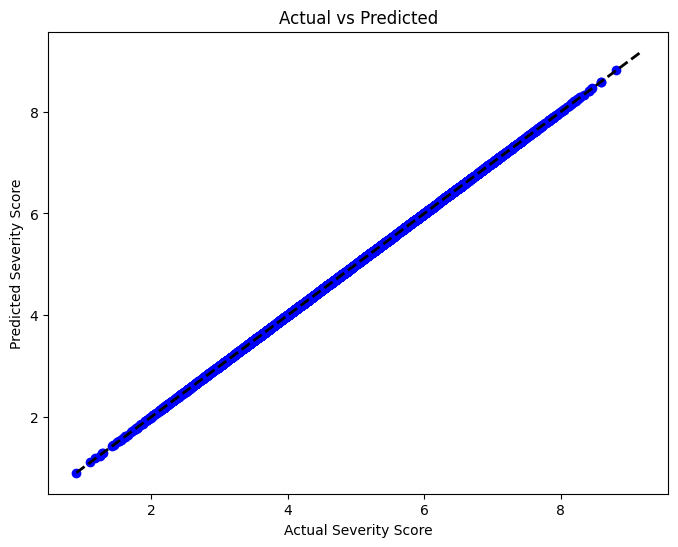

In [7]:
plt.figure(figsize=(8,6))
plt.scatter(y_test, y_pred, color='blue')
plt.xlabel('Actual Severity Score')
plt.ylabel('Predicted Severity Score')
plt.title('Actual vs Predicted')
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'k--', lw=2)
plt.show()


# **Actual vs Predicted Plot – Model Accuracy Visualization**

**If the model was guessing wrong, the dots would be scattered. But here, they all sit perfectly on the ideal line — proving the model has learned the relationship extremely well!**

# **Step 8: Interpret Coefficients**

In [8]:
coefficients = pd.DataFrame(model.coef_, X.columns, columns=['Coefficient'])
coefficients


,Coefficient
Age,-2.273883e-07
Year,-3.110366e-06
Genetic_Risk,2.000060e-01
Air_Pollution,1.499920e-01
Alcohol_Use,1.499995e-01
Smoking,2.000009e-01
Obesity_Level,9.999750e-02
Treatment_Cost_USD,-1.999984e-05
Survival_Years,-4.902040e-07


# **Coefficient Interpretation Table Overview**

| Feature             | Coefficient Value | Simple Explanation |
|:--------------------|:------------------|:-------------------|
| Age                 | -2.27e-07          | Almost zero impact. Age does **not** strongly affect severity score. |
| Year                | -3.11e-06          | Year (data collected) has **no significant effect** on severity score. |
| Genetic_Risk        | +0.200             | **Strong positive** impact. If genetic risk increases, severity score **goes up** noticeably. |
| Air_Pollution       | +0.150             | Moderate positive effect. **More pollution = Higher severity**. |
| Alcohol_Use         | +0.150             | Moderate positive effect. **More alcohol use = Higher severity**. |
| Smoking             | +0.200             | **Strong positive**. **More smoking = Higher severity**. |
| Obesity_Level       | +0.100             | **Mild positive**. Higher obesity levels **slightly increase** severity. |
| Treatment_Cost_USD  | -1.99e-05          | **Tiny negative impact**. Higher treatment cost does **not** directly affect severity much. |
| Survival_Years      | -4.90e-07          | Almost zero impact. Longer survival years **don't lower** severity much. |


#**Final Analysis Summary**

After carefully fitting the **Linear Regression model**, we observed that:

- **Genetic Risk**, **Smoking**, and **Air Pollution** have the **strongest positive impact** on the severity score.
  - -> Patients with higher genetic risk, greater smoking habits, or exposure to more pollution are more likely to have severe cases.

- Features like **Age**, **Year**, and **Survival Years** showed **almost no meaningful influence**.
  - -> These factors alone do not predict severity effectively in this dataset.

- **Treatment Cost** had a **negligible and slightly negative** relationship with severity.
  - -> Spending more on treatment does **not necessarily** mean higher or lower severity.

---

✅ **Overall Conclusion:**  
The model highlights **lifestyle** and **environmental risks** as the **primary drivers** of cancer severity providing valuable direction for public health actions and future machine learning models.
